## Visualizing categorical data

앞서 여러 시각적 표현방법을 사용해 데이터세트 안 여러 변수의 관계를 표현하였고, 주로 수치형 변수들 간의 관계를 살펴봄  
하지만 주요 변수 중 하나가 '범주형'(불연속형 그룹으로 나뉨)인 경우, 다른 접근 방식을 사용하는 것이 도움이 될 수 있음  

범주형 데이터 관련 시각화 방법  
(fig-lv `relplot()`, ax-lv `scatterplot()` , `lineplot()`와 같이 두가지 수준으로 나뉨)  


**fig-lv** `catplot()`  
**ax-lv**  
범주형 분산형 차트(Scatterplots):  
- stripplot() (with kind="strip"; 기본값)  
- swarmplot() (with kind="swarm")  

범주형 분포 플롯(distribution plots):  
- boxplot() (with kind="box")  
- violinplot() (with kind="violin")  
- boxenplot() (with kind="boxen")  

범주형 계산 플롯(estimate plots):  
- pointplot() (with kind="point")  
- barplot() (with kind="bar")  
- countplot() (with kind="count")  

답변하고자 하는 질문에 따라 사용할 플롯 결정  
통합 API를 사용해서 다양한 종류 간에 쉽게 전환하고 여러 관점에서 데이터를 볼 수 있음  
  
이 튜토리얼에서는 주로 fig-lv 인터페이스인 catplot()에 초점을 맞춤  

## Categorical scatterplots

catplot()의 플롯 : scatterplots  
범주형 데이터를 산점도로 표현할 때 한 범주에 속하는 모든 점이 범주형 변수에 해당하는 축을 따라 같은자리에 일직선으로 위치해야 하는 주요 문제를 해결하기 위해 서로 다른 접근 방식을 취함  
stripplot()의 접근 방식: 소량의 임의 '지터(jitter)'를 사용하여 범주형 축에서 점의 위치 조정

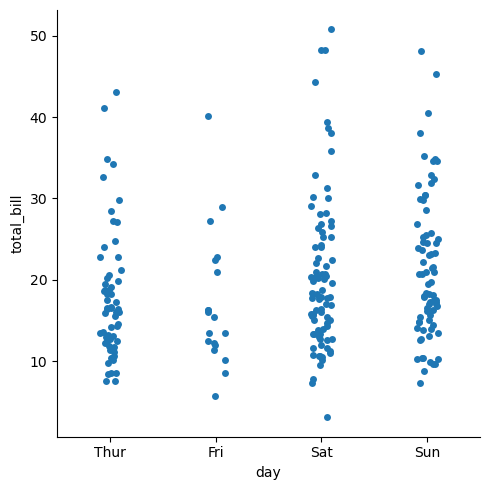

In [1]:
import seaborn as sns

tips = sns.load_dataset("tips")
sns.catplot(data=tips, x="day", y="total_bill")

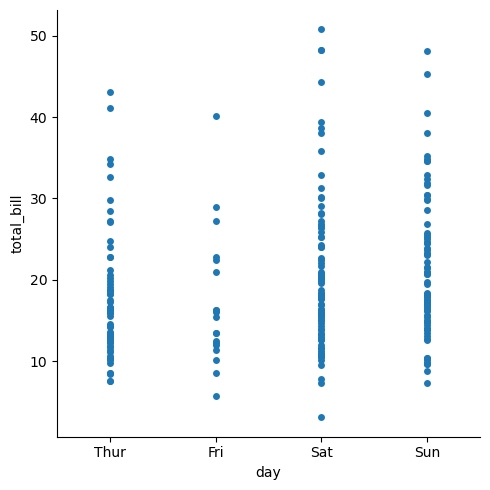

In [2]:
# 지터 파라미터로 지터의 크기를 제어하거나 지터를 완전히 비활성화할 수 있음:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False)

두 번째 접근 방식은 중첩을 방지하는 알고리즘을 사용하여 범주형 축을 따라 점을 조정합니다. 
상대적으로 작은 데이터 집합에서만 잘 작동하지만 관찰 분포를 더 잘 나타낼 수 있습니다. 
이러한 종류의 플롯을 "벌집형"이라고도 하며, catplot()에서 kind="swarm"을 설정하여 활성화하는 swarmplot()을 통해 그려집니다:

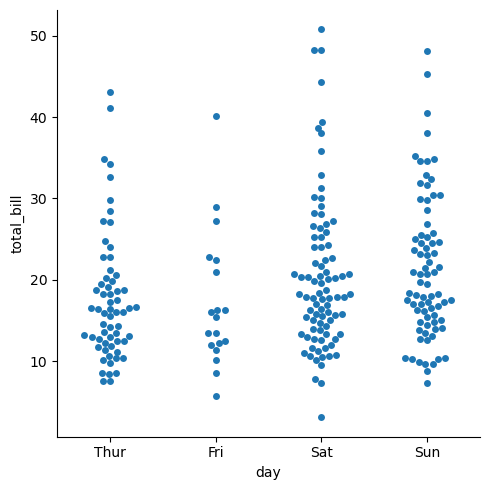

In [3]:
#중첩을 방지하는 알고리즘을 사용하여 범주형 축을 따라 점을 조정
#상대적으로 작은 데이터 집합에서만 잘 작동하지만 관찰 분포를 더 잘 나타낼 수 있음
# '벌집형(beeswarm)' 플롯이라고도 부름
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm")

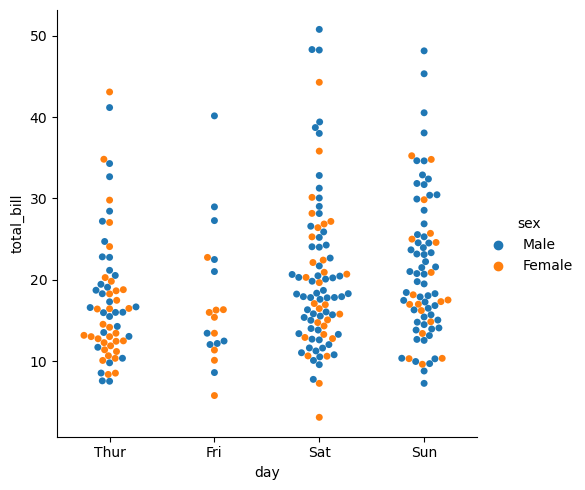

In [4]:
# 색조 시맨틱을 사용하여 범주형 플롯에 다른 차원을 추가할 수 있음
# (범주형 플롯은 현재 크기 또는 스타일 시맨틱은 지원하지 않음) 
# 범주형 플롯 함수마다 색조 시맨틱을 다르게 처리
# 분산형 차트의 경우 포인트의 색만 변경하면 됩니다:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm")

범주형 변수 정렬은 항상 명확하지 않으나 범주의 순서를 유추하려고 시도함  
데이터에 pandas 범주형 데이터 유형이 있을 경우 범주의 기본 순서 설정 가능  
범주형 축에 전달된 변수가 숫자로 표시되는 경우 정렬됨  
그러나 데이터는 여전히 범주형 데이터로 취급됨  

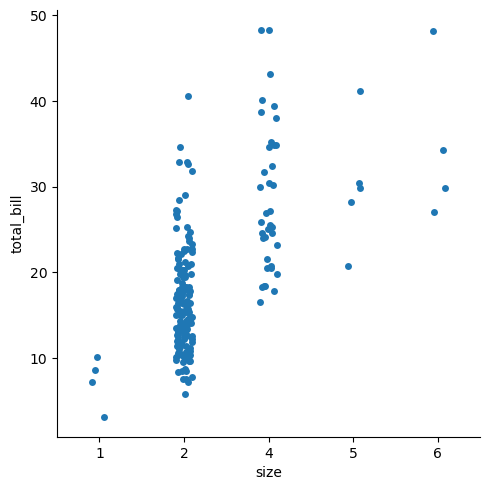

In [5]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill")

카테고리의 수준 사용  
순서 매개변수를 사용하여 플롯별로 순서 제어 가능
이는 한 그림에 여러 범주형 플롯을 그릴 때 중요할 수 있음:

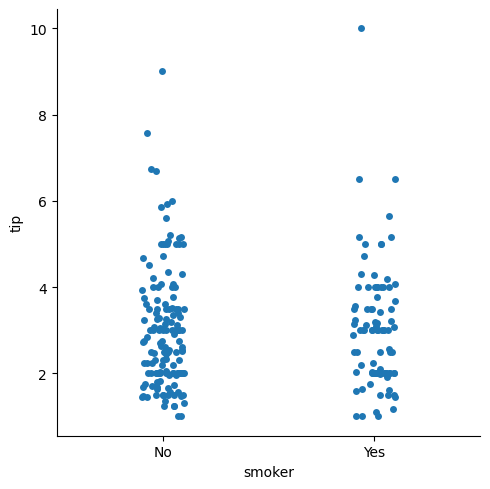

In [6]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"])

'범주형 축'= 그림 내 가로 축  
범주 이름이 비교적 길거나 카테고리가 많은 경우 세로로 배치하는게 나을 수 있음

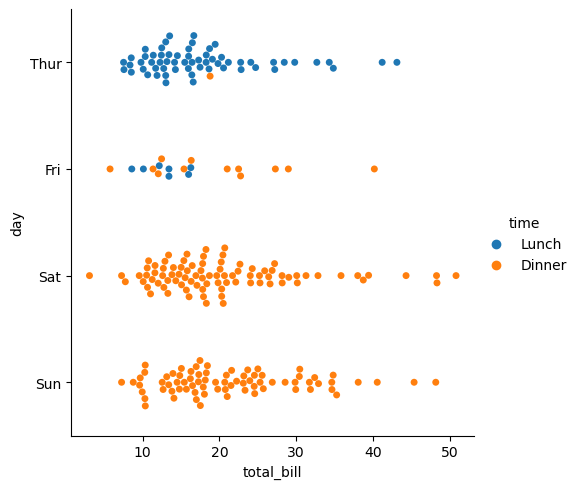

In [7]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm")

## Comparing distributions
데이터 크기가 커지면 범주형 분산형 차트는 각 범주 내 값의 분포에 대해 제공할 수 있는 정보가 제한됩니다.  
이 경우 범주 수준 간에 쉽게 비교할 수 있는 방식으로 분포 정보를 요약하는 몇 가지 접근 방식이 있습니다.

**Boxplots**  
첫 번째는 익숙한 박스플롯()입니다. 이 종류의 플롯은 분포의 세 사분위수 값과 극단값을 함께 보여줍니다.  
'수염'은 하위 및 상위 사분위수의 1.5 IQR 지점에 표시되며, 이 범위를 벗어나는 관측값은 독립적으로 표시됩니다.  
즉, 박스 플롯의 각 값은 데이터의 실제 관측값에 해당합니다.

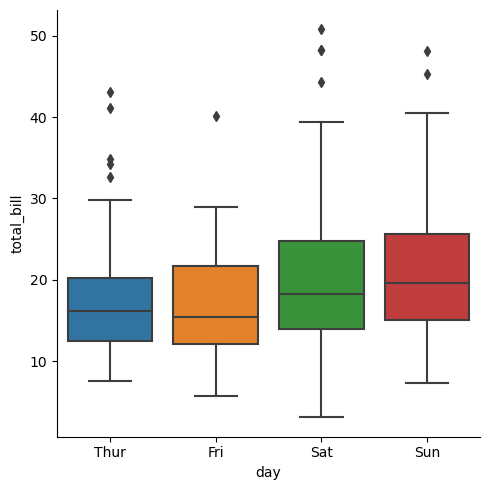

In [8]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box")

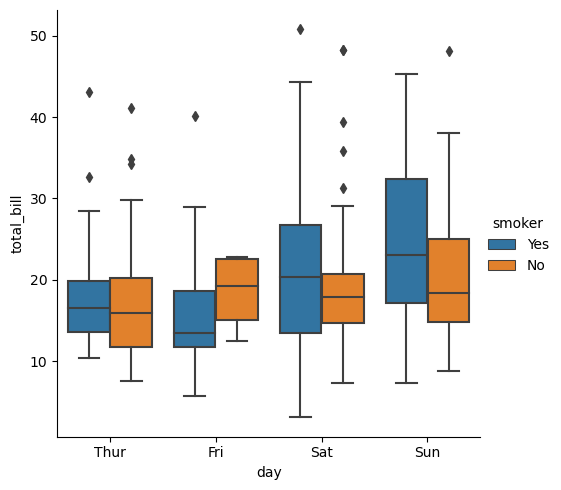

In [9]:
#  dodging(피하기) : 색조 추가시, 겹치지 않게 나란히 그려짐
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box")

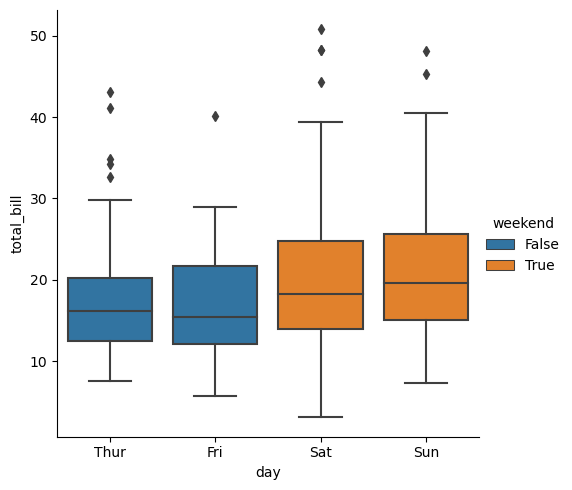

In [10]:
# 색조에 추가하는 변수가 계층적 관계가 아니라면 아래처럼 dodge = False 로 겹치게 그릴 수 있음
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
)

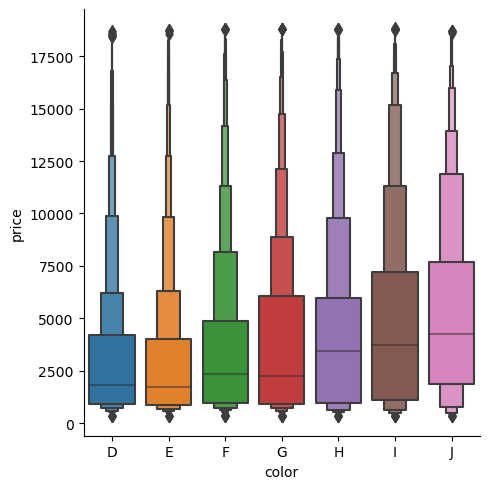

In [11]:
# boxenplot(): 박스 플롯과 유사, 분포의 모양에 대한 자세한 정보를 표시하는 데 최적화
# 큰 데이터 집합 표현에 적합
diamonds = sns.load_dataset("diamonds")
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
)

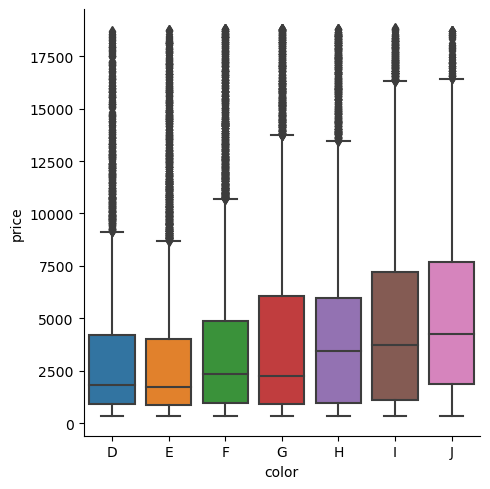

In [12]:
# boxplot 과 비교
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="box",
)

**violinplots**  

`violinplot()` : KDE + box plot  
- 장점 : 데이터 분포에대한 상세한 설명, 박스플롯이 함께 그려져 사분위수 및 수염 값을 함께 확인 가능  
- 단점 : KDE 플롯의 조정을 위한 파라미터 설정때문에 박스플롯에 비해 다소 복잡함

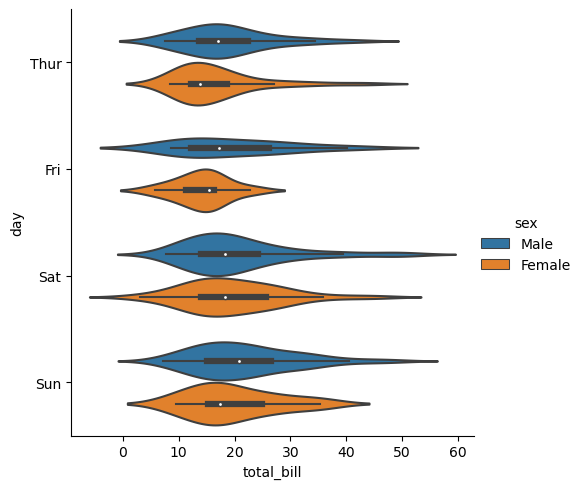

In [13]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
)

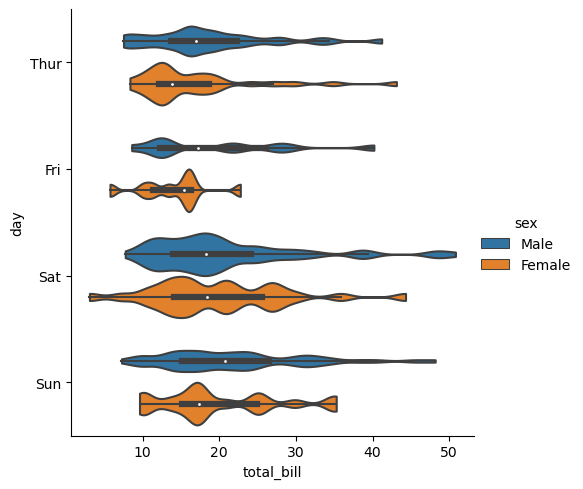

In [14]:
# KDE 플롯 설정 파라미터 추가
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw=.15, cut=0,
)

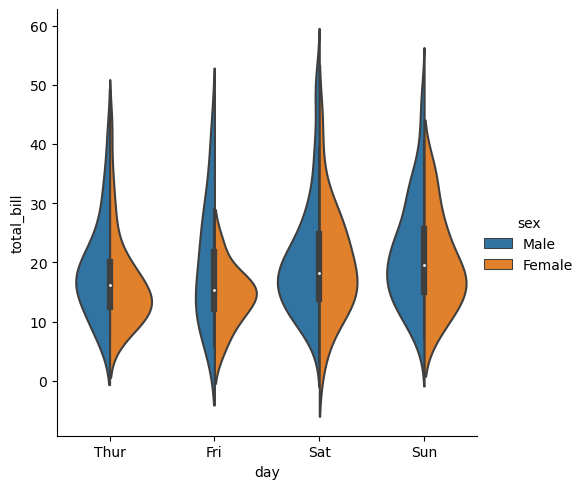

In [15]:
# 색조에 할당한 변수가 두 단계만 있을 경우 바이올린을 분할(split)한 뒤 붙여 공간을 효율적으로 사용할 수 있음
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
)

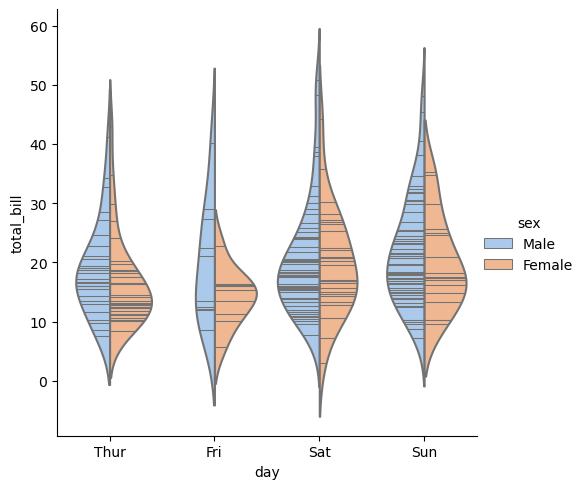

In [16]:
# 바이올린 내부에 표현되는 박스플롯을 개별 관측값을 표시하는 것 등으로 바꿀 수 있음
# {“box”, “quartile”, “point”, “stick”, None}
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

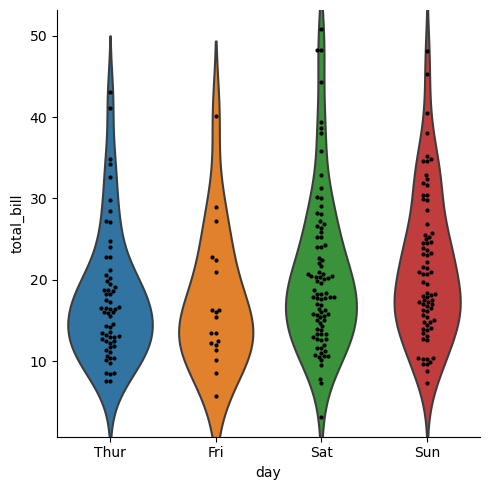

In [17]:
# swarmplot() 또는 stripplot()을 boxplot 또는 violinplot과 결합해 각 관측값을 분포 요약과 함께 표시
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

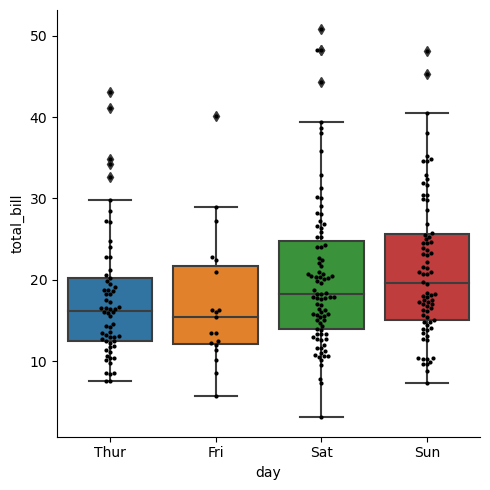

In [18]:
# 박스플롯에 결합하는건 안예쁘고 안 그럴싸함🫤
# 스트립도 별루... 바이올린에 스왐이 제일 나은듯?
g = sns.catplot(data=tips, x="day", y="total_bill", kind="box")
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax)

## Estimating central tendency
각 카테고리 내의 분포를 표시하는 대신 값의 중앙 경향에 대한 추정치를 표시하고 싶을 때 사용하는 두 가지 방법  
이 함수 기본 API 역시 지금껏 익힌 API와 동일함  
**1. Bar plots**
`barplot()` : 전체 데이터 집합에서 작동하며 함수를 적용하여 추정값을 구함(기본적으로 평균을 취함).  
각 범주에 여러 관측값이 있는 경우 부트스트래핑을 사용하여 추정치 주변의 신뢰 구간을 계산하고 오차 막대를 표현  

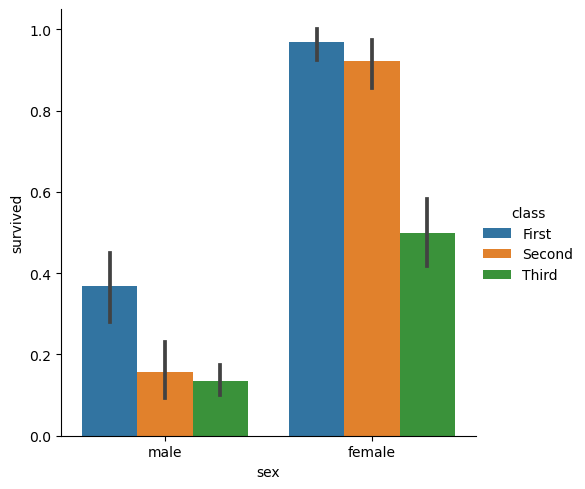

In [19]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

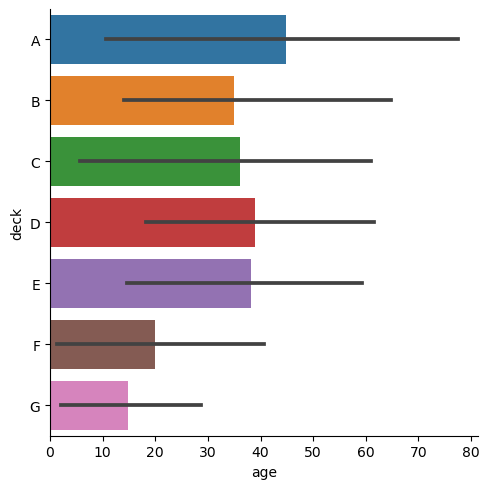

In [20]:
# 기본 오차 막대(errorbar) : 95% 신뢰구간
# 변경 가능
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 95), kind="bar")

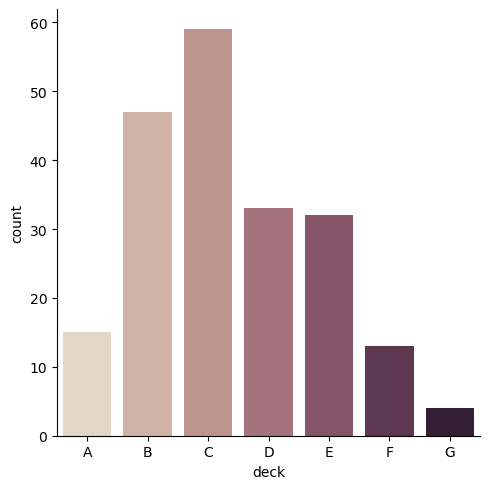

In [21]:
# countplot() : 변수에 대한 통계를 계산 대신 각 카테고리의 관찰 횟수를 표시하려는 경우
# = 정량적 변수가 아닌 범주형 변수에 대한 히스토그램과 유사
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25")

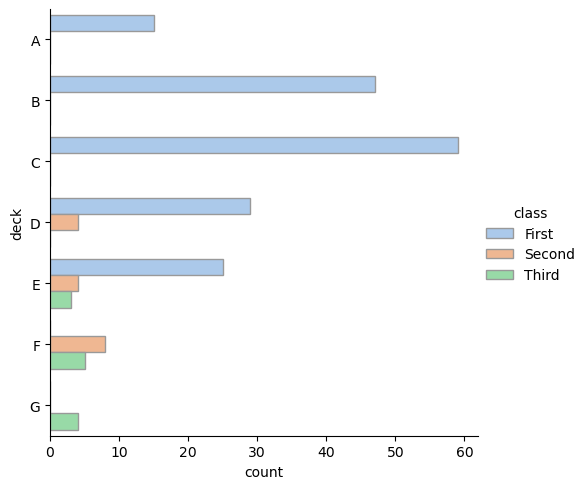

In [22]:
# 앞서 배운 다양한 파라미터 적용 가능
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
)

**Point plots**  
`pointplot()` : 다른 축에 높이가 있는 추정치 값을 인코딩하지만, 전체막대 대신 포인트 추정치와 신뢰 구간 표시  
같은 색조 카테고리의 점을 연결해 기울기 차이 확인이 쉬워 카테고리별로 관계가 어떻게 변하는지 쉽게 확인 가능



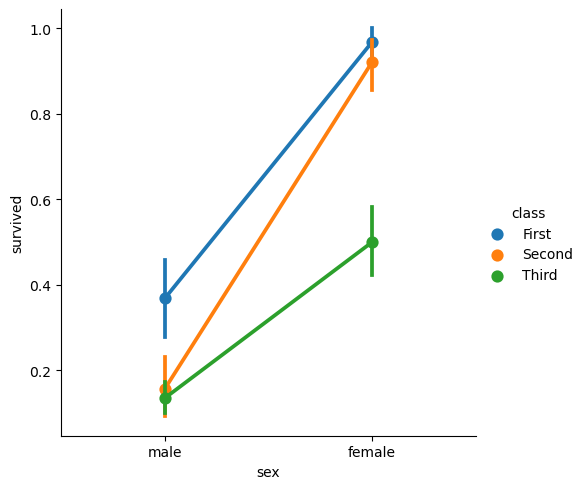

In [23]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point")

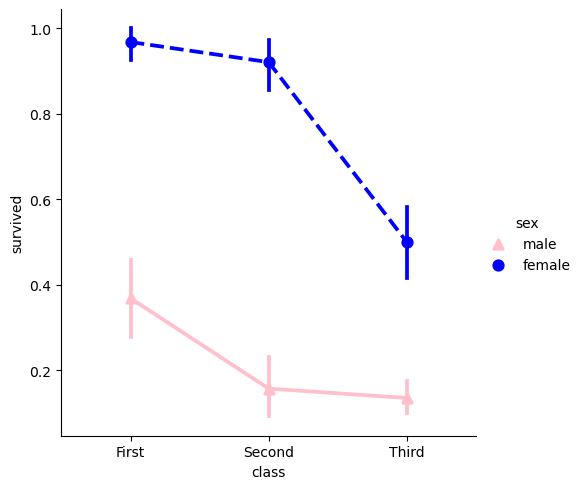

In [26]:
# 스타일 설정 시 최대한 구분하기 쉽고 흑백으로 잘 재현되는 그림을 만드는 것이 좋음  
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "pink", "female": "blue"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
)